In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv('logbook_assignment1.csv')


C:\Users\saadd\AppData\Local\Temp\ipykernel_8648\921134953.py:1: DtypeWarning: Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('logbook_assignment1.csv')


## Question 1


In [27]:
# 1.1.1
# determine what are not propper dates
# Improper formatting/garbage
# Propper date is month/day/year
# Note this only works if we clean up the stuff df["date_feuled"] = pd.to_datetime(df["date_feuled"], format='%b %d %Y', errors='raise')
import pandas as pd
import numpy as np

# Load the dataset
# df = df.head(100)
# Define a function to check if the date is valid
def is_valid_date(date_str):
    if pd.isna(date_str):
        return False
    try:
        pd.to_datetime(date_str, format='%b %d %Y', errors='raise')
        return True
        
    except (ValueError, TypeError):
        return False

# Apply the function to the 'date_fueled' column
# Creating a new column valid_date_feuled (this is the data set in memory not the actual csv file)
# this column is a binary column into trues and false

df['valid_date_fueled'] = df['date_fueled'].apply(is_valid_date)

# Calculate the percentage of invalid dates
invalid_date_percentage = (df['valid_date_fueled'].value_counts(normalize=True) * 100)[False]

print(f"Percentage of invalid 'date_fueled' entries: {invalid_date_percentage:.2f}%")


C:\Users\saadd\AppData\Local\Temp\ipykernel_8648\2897347251.py:10: DtypeWarning: Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('logbook_assignment1.csv')


Percentage of invalid 'date_fueled' entries: 11.68%


In [28]:
# 1.1.2 && 1.1.3
df['date_fueled'] = df.apply(lambda row: row['date_captured'] if not is_valid_date(row['date_fueled']) and is_valid_date(row['date_captured']) else row['date_fueled'], axis=1)
df.head(11)
#df['date_fueled'] = pd.to_datetime(df['date_fueled'], errors='coerce')


,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,valid_date_fueled
0,Apr 7 2022,Apr 7 2022,"73,370",NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...,False
1,Nov 7 2012,Aug 30 2016,"11,983",12.120,$5.599,$67.86,31.6,NaN,https://www.somewebsite.com/bmw/x3/2009/461150,True
2,Sep 22 2012,Sep 28 2012,"98,233",7.991,£5.45,£43.53,28.5,NaN,https://www.somewebsite.com/mercedes-benz/e300...,True
3,May 4 2019,May 4 2019,"163,802",10.575,£5.11,£54.00,46.8,NaN,https://www.somewebsite.com/bmw/320d/2010/247233,True
4,Feb 15 2022,Feb 15 2022,NaN,11.651,$3.029,$35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...,True
5,Oct 23 2021,Oct 23 2021,"147,567",3.413,$3.739,$12.76,29.0,NaN,https://www.somewebsite.com/volkswagen/passat/...,True
6,Nov 20 2021,Dec 12 2021,"105,929",9.044,$4.639,$41.96,29.5,NaN,https://www.somewebsite.com/mazda/3_sport/2010...,True
7,Jan 20 2022,Jan 20 2022,"59,475",14.962,$2.929,$43.82,27.3,NaN,https://www.somewebsite.com/subaru/forester/20...,True
8,Apr 16 2018,Apr 16 2018,"137,562",NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/kianival/2009/789684,False
9,Nov 29 2020,Nov 29 2020,"99,296",2.710,$1.999,$5.42,0.0,NaN,https://www.somewebsite.com/lexus/rx350/2012/8...,False


In [29]:
#1.1.3
df['date_fueled'] = df.apply(lambda row: pd.NaT if not is_valid_date(row['date_fueled']) else row['date_fueled'], axis=1)
df['date_fueled'] = pd.to_datetime(df['date_fueled'], errors='coerce')
df['date_captured'] = pd.to_datetime(df['date_captured'], errors='coerce')
print(df.dtypes)
df.head(11)

date_fueled          datetime64[ns]
date_captured        datetime64[ns]
odometer                     object
gallons                      object
cost_per_gallon              object
total_spent                  object
mpg                          object
miles                        object
user_url                     object
valid_date_fueled              bool
dtype: object


,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,valid_date_fueled
0,2022-04-07,2022-04-07,"73,370",NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...,False
1,2012-11-07,2016-08-30,"11,983",12.120,$5.599,$67.86,31.6,NaN,https://www.somewebsite.com/bmw/x3/2009/461150,True
2,2012-09-22,2012-09-28,"98,233",7.991,£5.45,£43.53,28.5,NaN,https://www.somewebsite.com/mercedes-benz/e300...,True
3,2019-05-04,2019-05-04,"163,802",10.575,£5.11,£54.00,46.8,NaN,https://www.somewebsite.com/bmw/320d/2010/247233,True
4,2022-02-15,2022-02-15,NaN,11.651,$3.029,$35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...,True
5,2021-10-23,2021-10-23,"147,567",3.413,$3.739,$12.76,29.0,NaN,https://www.somewebsite.com/volkswagen/passat/...,True
6,2021-11-20,2021-12-12,"105,929",9.044,$4.639,$41.96,29.5,NaN,https://www.somewebsite.com/mazda/3_sport/2010...,True
7,2022-01-20,2022-01-20,"59,475",14.962,$2.929,$43.82,27.3,NaN,https://www.somewebsite.com/subaru/forester/20...,True
8,2018-04-16,2018-04-16,"137,562",NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/kianival/2009/789684,False
9,2020-11-29,2020-11-29,"99,296",2.710,$1.999,$5.42,0.0,NaN,https://www.somewebsite.com/lexus/rx350/2012/8...,False


In [30]:
#1.1.4
# NOTE do we change both columns, and when they say remove do they mean "NaT" or remove the row?

df['date_fueled'] = df.apply(lambda row: pd.NaT if (row['date_fueled'].year < 2005 or row['date_fueled']>pd.Timestamp.now()) else row['date_fueled'], axis=1)
df['date_captured'] = df.apply(lambda row: pd.NaT if (row['date_captured'].year < 2005 or row['date_captured']>pd.Timestamp.now()) else row['date_captured'], axis=1)

df.head()


,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,valid_date_fueled
0,2022-04-07,2022-04-07,"73,370",NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...,False
1,2012-11-07,2016-08-30,"11,983",12.120,$5.599,$67.86,31.6,NaN,https://www.somewebsite.com/bmw/x3/2009/461150,True
2,2012-09-22,2012-09-28,"98,233",7.991,£5.45,£43.53,28.5,NaN,https://www.somewebsite.com/mercedes-benz/e300...,True
3,2019-05-04,2019-05-04,"163,802",10.575,£5.11,£54.00,46.8,NaN,https://www.somewebsite.com/bmw/320d/2010/247233,True
4,2022-02-15,2022-02-15,NaN,11.651,$3.029,$35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...,True


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


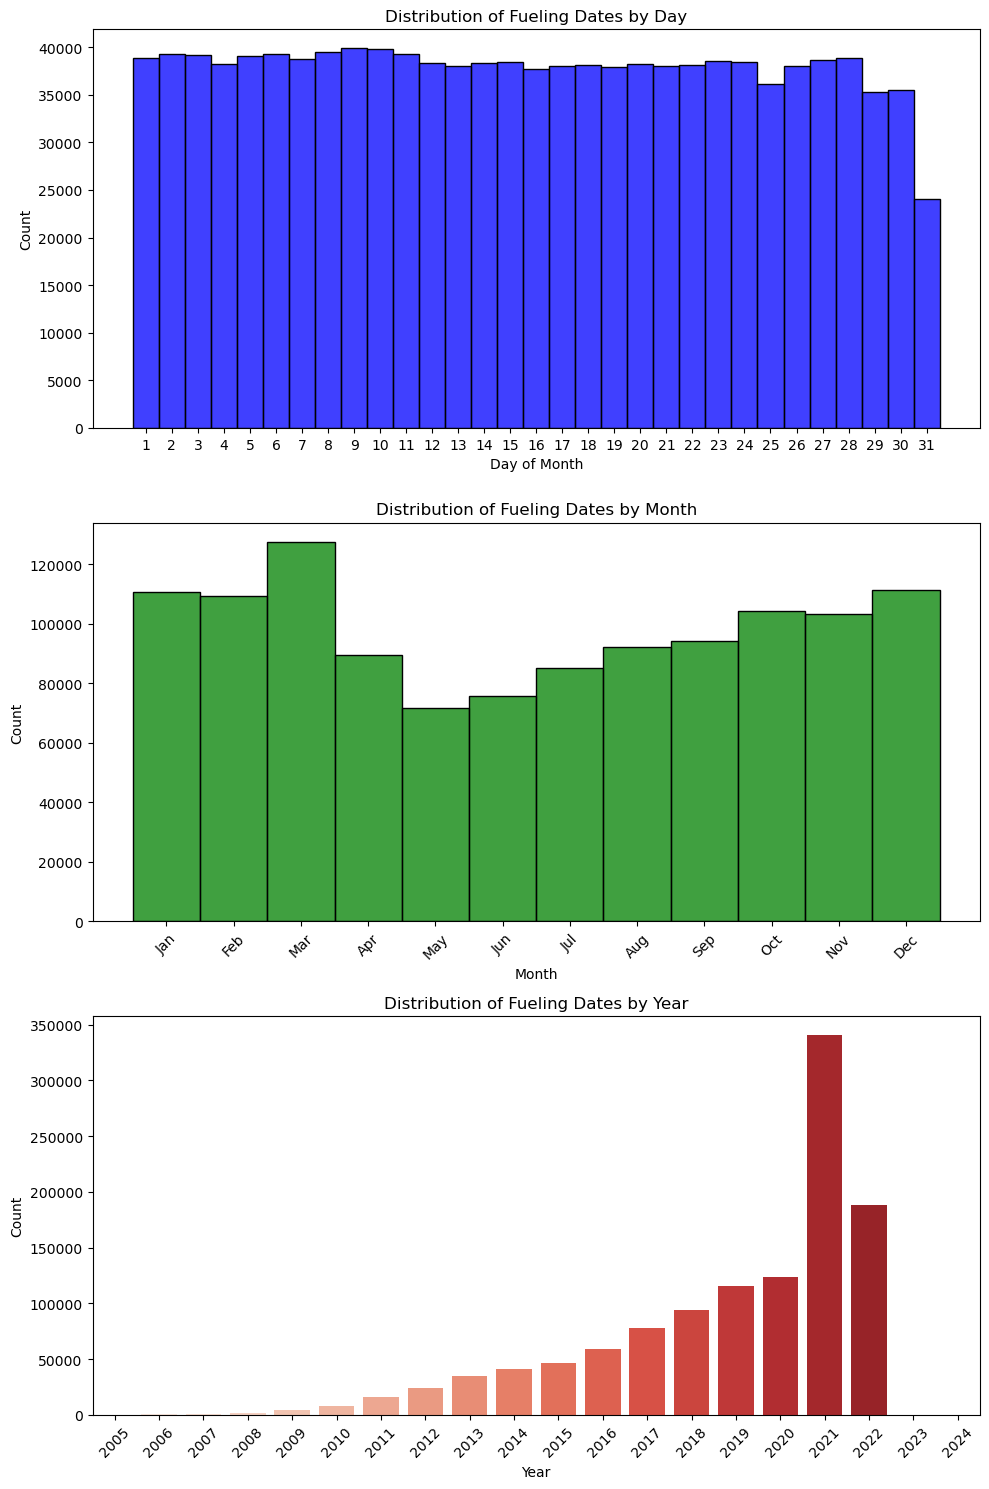

In [31]:
#1.1.5

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame creation for demonstration purposes
# df = pd.read_csv('your_data.csv')  # Uncomment and use your actual data

# Ensure 'date_fueled' is in datetime format
df['date_fueled'] = pd.to_datetime(df['date_fueled'], errors='coerce')

# Drop rows where 'date_fueled' is NaT (not-a-time)
df_graphing = df.copy()
df_graphing = df_graphing.dropna(subset=['date_fueled'])

# Extract day, month, and year
df_graphing['day'] = df_graphing['date_fueled'].dt.day
df_graphing['month'] = df_graphing['date_fueled'].dt.month
df_graphing['year'] = df_graphing['date_fueled'].dt.year

# Plot settings
plt.figure(figsize=(10, 15))

# Plot for day
plt.subplot(3, 1, 1)
sns.histplot(df_graphing['day'], bins=31, discrete=True, kde=False, color='blue')
plt.title('Distribution of Fueling Dates by Day')
plt.xlabel('Day of Month')
plt.ylabel('Count')
plt.xticks(range(1, 32))  # Set x-ticks to show all days of the month

# Plot for month
plt.subplot(3, 1, 2)
sns.histplot(df_graphing['month'], bins=12, discrete=True, kde=False, color='green')
plt.title('Distribution of Fueling Dates by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

# Plot for year
plt.subplot(3, 1, 3)
sns.countplot(data=df_graphing, x='year', palette='Reds')
plt.title('Distribution of Fueling Dates by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [32]:
#1.2.1

missing_gallons = df['gallons'].isna().mean() * 100
missing_miles = df['miles'].isna().mean() * 100
missing_odometer = df['odometer'].isna().mean() * 100

# Print out the percentages
print(f"Percentage of missing values in 'gallons': {missing_gallons:.2f}%")
print(f"Percentage of missing values in 'miles': {missing_miles:.2f}%")
print(f"Percentage of missing values in 'odometer': {missing_odometer:.2f}%")


Percentage of missing values in 'gallons': 6.32%
Percentage of missing values in 'miles': 87.55%
Percentage of missing values in 'odometer': 12.70%


In [33]:
#1.2.3

def to_float(x):
    try:
        # Remove any non-numeric characters (except for the decimal point)
        cleaned = x.replace(',', '')
        return float(cleaned)
    except:
        return None  # Return None if conversion fail
    
df['miles'] = df['miles'].apply(lambda x: to_float(x) if isinstance(x, str) else x)
df['odometer'] = df['odometer'].apply(lambda x: to_float(x) if isinstance(x, str) else x)
df['gallons'] = df['gallons'].apply(lambda x: to_float(x) if isinstance(x, str) else x)


df.head(10)

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,valid_date_fueled
0,2022-04-07,2022-04-07,73370.0,NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...,False
1,2012-11-07,2016-08-30,11983.0,12.120,$5.599,$67.86,31.6,NaN,https://www.somewebsite.com/bmw/x3/2009/461150,True
2,2012-09-22,2012-09-28,98233.0,7.991,£5.45,£43.53,28.5,NaN,https://www.somewebsite.com/mercedes-benz/e300...,True
3,2019-05-04,2019-05-04,163802.0,10.575,£5.11,£54.00,46.8,NaN,https://www.somewebsite.com/bmw/320d/2010/247233,True
4,2022-02-15,2022-02-15,NaN,11.651,$3.029,$35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...,True
5,2021-10-23,2021-10-23,147567.0,3.413,$3.739,$12.76,29.0,NaN,https://www.somewebsite.com/volkswagen/passat/...,True
6,2021-11-20,2021-12-12,105929.0,9.044,$4.639,$41.96,29.5,NaN,https://www.somewebsite.com/mazda/3_sport/2010...,True
7,2022-01-20,2022-01-20,59475.0,14.962,$2.929,$43.82,27.3,NaN,https://www.somewebsite.com/subaru/forester/20...,True
8,2018-04-16,2018-04-16,137562.0,NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/kianival/2009/789684,False
9,2020-11-29,2020-11-29,99296.0,2.710,$1.999,$5.42,0.0,NaN,https://www.somewebsite.com/lexus/rx350/2012/8...,False


In [34]:
#1.2.2
df['mpg'] = df['mpg'].apply(lambda x: to_float(x) if isinstance(x, str) else x)


def fix_measurements(row):
    if(pd.isna(row['gallons'])):
        
        row['gallons'] = (1/row['mpg']) * row['miles']
        
    if(pd.isna(row['miles'])):
        
        row['miles'] = row['mpg']*row['gallons']
        
    if(pd.isna(row['mpg'])):
        
        row['mpg'] = row['miles']/ row['gallons']
    return row
            
df = df.apply(lambda row: fix_measurements(row),  axis=1)

df.head(100)

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,valid_date_fueled
0,2022-04-07,2022-04-07,73370.0,NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...,False
1,2012-11-07,2016-08-30,11983.0,12.120,$5.599,$67.86,31.6,382.9920,https://www.somewebsite.com/bmw/x3/2009/461150,True
2,2012-09-22,2012-09-28,98233.0,7.991,£5.45,£43.53,28.5,227.7435,https://www.somewebsite.com/mercedes-benz/e300...,True
3,2019-05-04,2019-05-04,163802.0,10.575,£5.11,£54.00,46.8,494.9100,https://www.somewebsite.com/bmw/320d/2010/247233,True
4,2022-02-15,2022-02-15,NaN,11.651,$3.029,$35.29,21.0,244.4000,https://www.somewebsite.com/honda/passport/201...,True
...,...,...,...,...,...,...,...,...,...,...
95,2014-05-14,2014-05-14,NaN,12.622,£5.03,£63.50,25.2,318.6000,https://www.somewebsite.com/alfa_romeo/155/199...,False
96,2022-01-24,2022-01-24,NaN,13.181,$3.579,$47.17,10.8,142.1000,https://www.somewebsite.com/mazda/rx-7/1990/11...,True
97,2022-02-14,2022-02-14,26753.0,17.370,$3.339,$58.00,15.9,276.1830,https://www.somewebsite.com/volvo/xc90/2019/94...,True
98,2022-04-05,2022-04-05,78429.0,10.567,R73.85,R780.40,0.0,0.0000,https://www.somewebsite.com/ford/transit_conne...,True


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

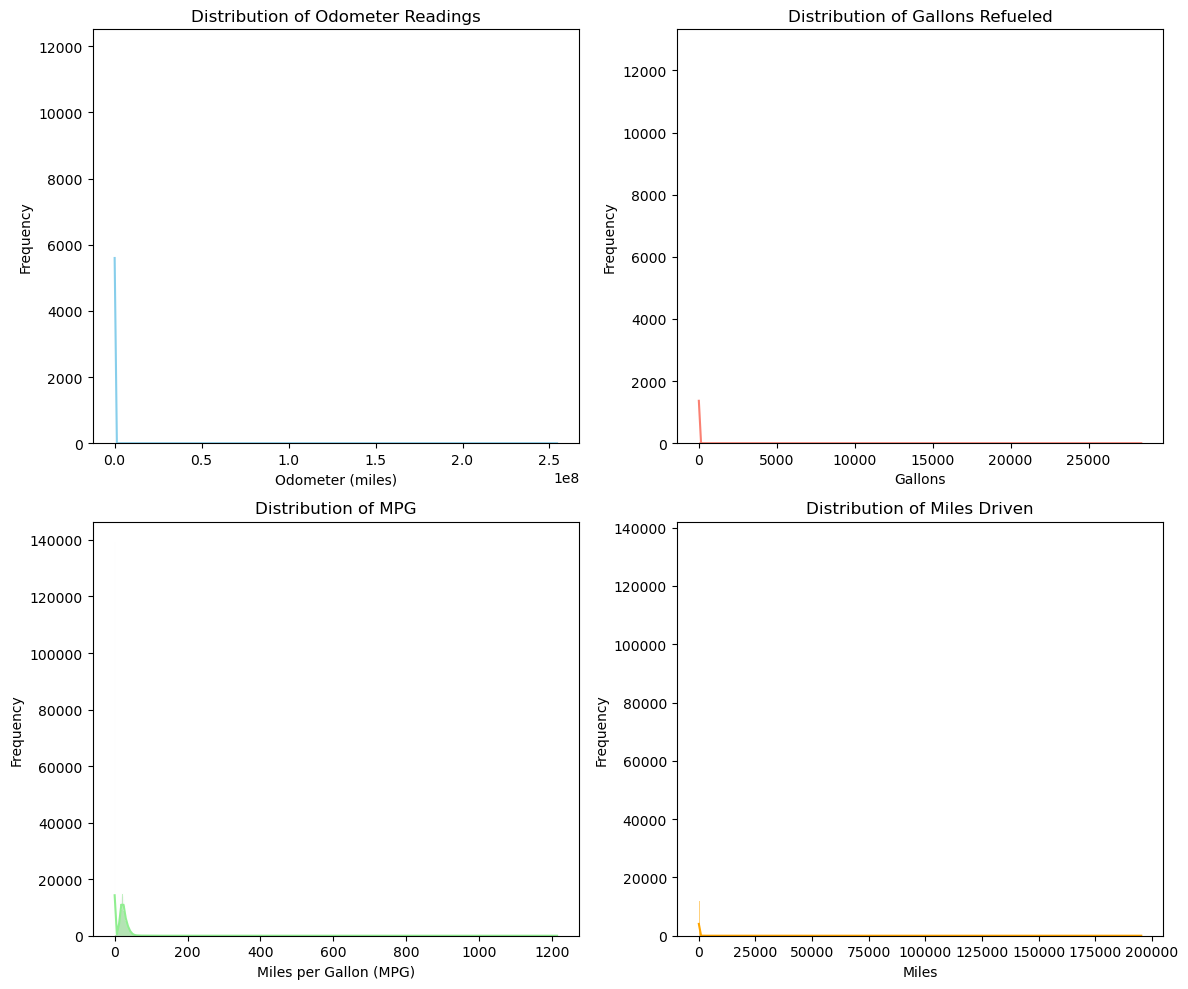

In [36]:
# Set up the plotting environment
plt.figure(figsize=(12, 10))

df_temp = df.copy()
# Plot distribution for 'odometer'
plt.subplot(2, 2, 1)
sns.histplot(df_temp['odometer'].dropna(), kde=True, color='skyblue')
plt.title('Distribution of Odometer Readings')
plt.xlabel('Odometer (miles)')
plt.ylabel('Frequency')

# Plot distribution for 'gallons'
plt.subplot(2, 2, 2)
sns.histplot(df_temp['gallons'].dropna(), kde=True, color='salmon')
plt.title('Distribution of Gallons Refueled')
plt.xlabel('Gallons')
plt.ylabel('Frequency')

# Plot distribution for 'mpg'
plt.subplot(2, 2, 3)
sns.histplot(df_temp['mpg'].dropna(), kde=True, color='lightgreen')
plt.title('Distribution of MPG')
plt.xlabel('Miles per Gallon (MPG)')
plt.ylabel('Frequency')

# Plot distribution for 'miles'
plt.subplot(2, 2, 4)
sns.histplot(df_temp['miles'].dropna(), kde=True, color='orange')
plt.title('Distribution of Miles Driven')
plt.xlabel('Miles')
plt.ylabel('Frequency')

# Adjust layout for better fit
plt.tight_layout()
plt.show()

In [37]:
#1.2.5

# Ensure columns are floats
df['odometer'] = df['odometer'].astype(float)
df['gallons'] = df['gallons'].astype(float)
df['mpg'] = df['mpg'].astype(float)
df['miles'] = df['miles'].astype(float)

# Compute descriptive statistics
statistics = pd.DataFrame()

for column in ['odometer', 'gallons', 'mpg', 'miles']:
    stats = df[column].describe()
    mode = df[column].mode()[0]  # Get the most frequent value
    statistics[column] = pd.Series({
        'mean': stats['mean'],
        'std': stats['std'],
        'min': stats['min'],
        '25%': stats['25%'],
        '50%': stats['50%'],
        '75%': stats['75%'],
        'max': stats['max'],
        'most_frequent': mode
    })

print(statistics)

                   odometer       gallons          mpg          miles
mean           1.039960e+05     12.801068    22.163322     269.489628
std            3.405252e+05     74.472096    15.743052     725.709249
min            0.000000e+00      0.000000     0.000000       0.000000
25%            4.592000e+04      8.990000    15.600000     181.400000
50%            9.188200e+04     11.954000    21.800000     267.058000
75%            1.469220e+05     14.939000    28.500000     342.769250
max            2.543621e+08  28380.000000  1214.300000  195321.200000
most_frequent  1.000000e+00     10.567000     0.000000       0.000000
